In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# these values should be defined by user
data_filename = "Zhili_v5_2021May08.csv"
PAR1_COL = 0
PAR2_COL = 1
PERFORMANCE_COL = 2

In [3]:
# obtain data from specified data file

par1 = np.array([])
par2 = np.array([])
performance = np.array([])

with open(data_filename, 'r') as file:
    csvreader = csv.reader(file)
    
    # assuming field names are the first row of data file
    fields = next(csvreader)
    
    for row in csvreader:
        par1 = np.append(par1, row[PAR1_COL])
        par2 = np.append(par2, row[PAR2_COL])
        performance = np.append(performance, float(row[PERFORMANCE_COL]))
        
print(par1)
print(par2)
print(performance)
print(fields)

['8' '8' '8' '8' '8' '8' '16' '16' '16' '16' '16' '16' '32' '32' '32' '32'
 '32' '32']
['128' '256' '512' '1024' '2048' '4096' '128' '256' '512' '1024' '2048'
 '4096' '128' '256' '512' '1024' '2048' '4096']
[ 280.922  279.223  279.045  512.     760.    1244.     276.967  276.63
  273.517  394.     518.     757.     275.997  275.903  274.527  333.
  396.     513.   ]
['PAR', 'BSIZE', 'Execution Time (s)']


In [4]:
# create maps from par values (strings) to graph coordinates (integers)

par1_coord_map = {}
par1_coord_map_reverse = {}
coord = 0
for val in par1:
    if val not in par1_coord_map:
        par1_coord_map[val] = coord
        par1_coord_map_reverse[coord] = val
        coord = coord + 1
        
par2_coord_map = {}
par2_coord_map_reverse = {}
coord = 0
for val in par2:
    if val not in par2_coord_map:
        par2_coord_map[val] = coord
        par2_coord_map_reverse[coord] = val
        coord = coord + 1
        
par1_coords = np.array([par1_coord_map[val] for val in par1])
par2_coords = np.array([par2_coord_map[val] for val in par2])

unique_par1_coords = np.unique(par1_coords)
unique_par2_coords = np.unique(par2_coords)

print(par1_coords)
print(par2_coords)
print(unique_par1_coords)
print(unique_par2_coords)

[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5]
[0 1 2]
[0 1 2 3 4 5]


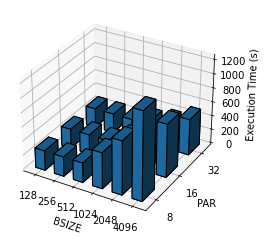

In [5]:
# create 3D bar plot

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# define lower coordinate of z axis
floor = np.zeros(num_vals)

# define width and depth of bars
width = 0.5
depth = 0.5

dpar1 = np.ones(num_vals)*width
dpar2 = np.ones(num_vals)*depth

ax1.bar3d(par2_coords, par1_coords, floor, dpar2, dpar1, performance, 
          edgecolor='black')

ax1.set_xlabel(fields[PAR2_COL])
ax1.set_ylabel(fields[PAR1_COL])
ax1.set_zlabel(fields[PERFORMANCE_COL])

plt.xticks(unique_par2_coords + width/2, 
           [par2_coord_map_reverse[coord] for coord in unique_par2_coords])
plt.yticks(unique_par1_coords + depth/2, 
           [par1_coord_map_reverse[coord] for coord in unique_par1_coords])

plt.show()

0.125


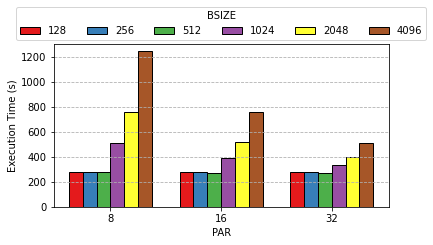

In [6]:
# create 2D bar plot with color key

fig = plt.figure()
ax1 = fig.add_subplot(111)

bar_width = 1 / (unique_par2_coords.size + 2)
print(bar_width)

max_num_colors = 8
colormap = plt.get_cmap('Set1', max_num_colors)

for par2_coord in unique_par2_coords:
    indices = np.where(par2_coords == par2_coord)[0]
    X = par1_coords[indices] + (par2_coord * bar_width)
    Y = performance[indices]
    ax1.bar(X, Y, width=bar_width, label=par2_coord_map_reverse[par2_coord],
           color=colormap(par2_coord/max_num_colors), edgecolor='black')
    
ax1.set_xlabel(fields[PAR1_COL])
ax1.set_ylabel(fields[PERFORMANCE_COL])

# Shrink the current box's height by 10% on the top
box = ax1.get_position()
ax1.set_position([box.x0, box.y0,
                 box.width, box.height * 0.75])

# Put the legend above the box
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.255), 
           ncol=unique_par2_coords.size, title=fields[PAR2_COL])

plt.xticks(unique_par1_coords + (unique_par2_coords.size - 1)*bar_width/2, 
           [par1_coord_map_reverse[coord] for coord in unique_par1_coords])

plt.grid(axis='y', linestyle='--')

plt.show()